In [42]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from FRED_data_pull import *
from pathlib import Path
from datetime import datetime, timedelta
import os
import dotenv
dotenv.load_dotenv()
api_key = os.environ['FRED_API_KEY']
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Obtain and Clean Data

In [3]:
data_raw = pull_data([#'PPIFIS',
                      'CPIAUCSL',
                      'CPILFESL',
                      'PCEPILFE',
                      'PCEPI',
                      'UNRATE',
                      'GASREGW',
                      'DCOILWTICO',
                      'DTWEXBGS',
                      'EXPINF2YR',
                      'IR'
                    ],
                 'm', api_key)

data_raw = data_raw[::-1]

C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.stlouisfed.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.stlouisfed.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.stlouisfed.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1

In [282]:
#ppi = pull_data(['PPIFIS'],
#                 'm', api_key)
cpi = pull_data(['CPIAUCSL'],
                 'm', api_key)
core_cpi = pull_data(['CPILFESL'],
                 'm', api_key)
pce = pull_data(['PCEPI'],
                 'm', api_key)
core_pce = pull_data(['PCEPILFE'],
                 'm', api_key)
gasoline = pull_data(['GASREGW'],
                 'm', api_key)
crude = pull_data(['DCOILWTICO'],
                 'm', api_key)
#dollar = pull_data(['DTWEXBGS'],
#                 'm', api_key)
unemployment = pull_data(['UNRATE'],
                 'm', api_key)
import_prices = pull_data(['IR'],
                 'm', api_key)
inflation_expectations = pull_data(['T5YIE'],
                 'm', api_key)

C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.stlouisfed.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.stlouisfed.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.stlouisfed.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1

In [283]:
#inflation_expectations = pull_data(['EXPINF2YR'],
#                 'm', api_key)

In [326]:
file_path = Path("ism_df.xlsx")
ism_df = pd.read_excel(file_path).set_index('date')
file_path = Path("dxy_df.xlsx")
dxy_df = pd.read_excel(file_path).set_index('date')
#file_path = Path("Adobe DPI.xlsx")
#adbe_df = pd.read_excel(file_path).set_index('date')

In [327]:
data_raw = pd.DataFrame()
#data_raw['DXY'] = dollar
data_raw['Gasoline'] = gasoline
data_raw['Crude'] = crude
data_raw['Unemployment'] = unemployment
data_raw['CPI'] = cpi
data_raw['Core CPI'] = core_cpi
data_raw['PCE'] = pce
data_raw['Core PCE'] = core_pce
#data_raw['Import Prices'] = import_prices
#data_raw['PPI'] = ppi
data_raw['Expectations'] = inflation_expectations

data_raw['DXY'] = dxy_df

data_raw = data_raw[::-1]

In [328]:
data = (np.log(data_raw).diff()*100)[1:]
data['Unemployment'] = (data_raw['Unemployment'].diff()*100)[1:]
#data['EXPINF2YR'] = (data_raw['EXPINF2YR'].diff()*1200)[1:]
data['Expectations'] = (data_raw['Expectations'].diff()*100)[1:]

#data.iloc[-2,3] = np.nan
#data.iloc[-2,4] = np.nan

C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [329]:
data['ISM Services'] = ism_df 
#data['Adobe DPI'] = adbe_df*1200

In [330]:
data = data[data.index >= '2003-02-28']
#data = data[data.index >= '2014-01-31']

In [331]:
data

,Gasoline,Crude,Unemployment,CPI,Core CPI,PCE,Core PCE,Expectations,DXY,ISM Services
date,,,,,,,,,,
2003-02-28,10.103017,8.379427,10.0,0.546151,0.051962,0.420095,0.137942,25.0,-0.159017,60.5
2003-03-31,4.840630,-6.694163,0.0,0.163265,0.000000,0.256359,0.160692,5.0,-0.463540,59.4
2003-04-30,-6.339722,-17.358632,10.0,-0.381368,0.000000,-0.169974,0.110803,-13.0,-0.850408,55.7
2003-05-31,-5.964178,-0.213220,10.0,-0.163890,0.207577,-0.114767,0.143734,-23.0,-3.589562,50.0
2003-06-30,-0.267559,8.683349,20.0,0.109290,0.051827,0.108323,0.055911,2.0,-0.560362,52.3
...,...,...,...,...,...,...,...,...,...,...
2023-11-30,-8.517626,-9.742591,-10.0,0.160181,0.307501,-0.009892,0.089107,-6.0,-1.838006,57.6
2023-12-31,-5.705205,-7.745028,0.0,0.232827,0.274955,0.118637,0.144733,-12.0,-1.140626,56.7
2024-01-31,-1.900524,3.081380,0.0,0.304968,0.391622,0.344401,0.414739,9.0,0.347506,64.0


## PCA (To Get K_Factor)

In [12]:
# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.dropna())

n_components = 5  # Choose the number of components (dimensions) you want to reduce to
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [13]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)


Explained Variance Ratio: [0.48385079 0.17879672 0.10704498 0.08222653 0.05322234]


# Fit Model

In [233]:
cutoff = 40
const_pre = np.ones(len(data)-cutoff)
model = sm.tsa.DynamicFactor(data[:-cutoff], exog = const_pre, k_factors=2, factor_order=12, freq = 'M')#, enforce_stationarity=False)

results = model.fit(maxiter=1000000, method = "nm")

print(results.summary())

Optimization terminated successfully.
         Current function value: 17.249313
         Iterations: 286687
         Function evaluations: 310704
                                                                           Statespace Model Results                                                                           
Dep. Variable:     ['DXY', 'Gasoline', 'Crude', 'Unemployment', 'CPI', 'Core CPI', 'PCE', 'Core PCE', 'Expectations', 'ISM Services']   No. Observations:                  177
Model:                                                                                             DynamicFactor(factors=2, order=12)   Log Likelihood               -3053.128
                                                                                                                       + 1 regressors   AIC                           6282.257
Date:                                                                                                                Wed, 27 Mar 2024   BIC              

In [249]:
results_appended = results.append(endog = data[-cutoff:-1], exog = np.ones(cutoff-1))

# Specify the number of steps ahead you want to forecast
steps_ahead = 3  # For example, forecasting 12 months ahead
const_forecast = np.ones(steps_ahead)
# Generate forecasts
forecasts = results_appended.forecast(steps=steps_ahead, exog=const_forecast)

# The 'forecasts' variable now contains the forecasted values for each variable for the next 12 months
print(forecasts)


                 DXY  Gasoline     Crude  Unemployment       CPI  Core CPI  \
2024-02-29  0.545434 -4.676400 -2.619935    -68.761787  0.029979  0.295166   
2024-03-31  1.054630 -8.088677 -8.565753    -10.637173 -0.207577  0.179502   
2024-04-30  0.477925 -2.606638 -3.582708     20.055379  0.007362  0.112110   

                 PCE  Core PCE  Expectations  ISM Services  
2024-02-29  0.045078  0.205470    -12.141919     56.943367  
2024-03-31 -0.122570  0.110485    -18.011901     53.531926  
2024-04-30  0.029177  0.089280     -4.837167     56.584107  


## Update Existing Forecasts

In [250]:
#start_date = str(data.index[-1])[:7]
#end_date = str(data.index[-1] + timedelta(32))[:7]
def get_news(data, results, lookback=1):
    start_date = data.index[-lookback]
    #print(start_date)
    end_date = start_date + relativedelta(months=lookback+1)
    end_date = datetime(end_date.year, end_date.month, 1) - timedelta(days=1)
    #print(results.summary())

    const_post_plus1 = np.ones(len(data) + 1)
    news = results.news(data, exog=const_post_plus1, start=start_date, end=end_date)
    return news

news = get_news(data, results_appended)

print(news.summary())

                                       News                                       
Model:                  DynamicFactor   Original sample:       2006-02-28 00:00:00
Date:                Wed, 27 Mar 2024                        - 2024-01-31 00:00:00
Time:                        11:18:47   Update through:        2024-02-29 00:00:00
                                        # of revisions:                          0
                                        # of new datapoints:                     8
                                      Impacts                                      
        impact date impacted variable estimate (prev) impact of news estimate (new)
-----------------------------------------------------------------------------------
2024-02-29 00:00:00               CPI            0.03           0.38           0.41
                NaT          Core CPI            0.30           0.04           0.33
                NaT          Core PCE            0.21           0.06           0.2

In [251]:
def update_forecast_data(forecast_df, news,length=3):
    if length < 3:
        length = 3
    
    new_df = forecast_df.copy()
    num_cols = len(new_df.columns)
    for i in range(1,length):
        for j in range(num_cols):
            revision_date = news.impacts.index[j*i][0]
            col_name = news.impacts.index[j*i][1]
            new_df.loc[revision_date, col_name] = news.impacts.iloc[j*i,4]
    return new_df

def combine_data(history_df, forecast_df):
    #print(data)
    num_cols = len(history_df.columns)
    if num_cols == len(forecast_df.columns):
        new_df = pd.concat([history_df, forecast_df[1:]])
        for i in range(num_cols):
            if np.isnan(history_df.iloc[-1,i]):
                new_df.iloc[-len(forecast_df),i] = forecast_df.iloc[0,i]
        return new_df
    else:
        raise ValueError()

new_forecasts = update_forecast_data(forecasts, news)
new_data = combine_data(data, new_forecasts)
new_data.tail(10)

,DXY,Gasoline,Crude,Unemployment,CPI,Core CPI,PCE,Core PCE,Expectations,ISM Services
2023-07-31,-0.980718,0.725450,7.959366,-10.000000,0.205379,0.226835,0.126354,0.119906,7.000000,57.600000
2023-08-31,1.513504,6.537220,6.759845,30.000000,0.510467,0.229874,0.356586,0.097998,3.000000,58.700000
2023-09-30,1.457497,-0.104221,9.420378,0.000000,0.358939,0.318556,0.383361,0.328471,1.000000,58.600000
2023-10-31,1.471866,-5.989170,-4.330373,0.000000,0.079048,0.239858,0.042871,0.154251,6.000000,58.000000
2023-11-30,-1.837997,-8.517626,-9.742591,-10.000000,0.160181,0.307501,-0.009892,0.089107,-6.000000,57.600000
2023-12-31,-1.140622,-5.705205,-7.745028,0.000000,0.232827,0.274955,0.118637,0.144733,-12.000000,56.700000
2024-01-31,0.347602,-1.900524,3.081380,0.000000,0.304968,0.391622,0.344401,0.414739,9.000000,64.000000
2024-02-29,0.693082,4.358889,4.095685,20.000000,0.441088,0.357776,0.316114,0.266606,10.000000,58.600000
2024-03-31,0.486665,-3.781707,-8.565753,-10.637173,0.040639,0.179502,0.052620,0.176551,-18.011901,53.531926
2024-04-30,0.477925,-2.606638,-3.582708,20.055379,0.007362,0.112110,0.029177,0.089280,-4.837167,56.584107


## Evaluate Historical Performance

In [264]:
def test_results(data, results, steps_ahead = 2, missing_var_names = None):
    start_point = len(results.data.endog)
    
    if missing_var_names is None:
        missing_var_names = list(data.columns[data.iloc[-1].isna()])

    errors_df = pd.DataFrame(0, index=range(steps_ahead), columns=data.columns)
    preds_dfs = [pd.DataFrame(columns=data.columns)]*steps_ahead
    const_forecast = np.ones(steps_ahead)
    #print(forecasts)
    results_appended = results
    for i in range(start_point, len(data)-steps_ahead):
        # Generate forecasts
        forecasts = results_appended.forecast(steps=steps_ahead, exog=const_forecast)
        
        print(i-start_point)
        new_data = data.copy()[:i+1]

        if len(missing_var_names) > 0:
            for j, col in enumerate(new_data.columns):
                if col in missing_var_names:
                    new_data.iloc[-1, j] = np.nan
                    #print(new_data.tail())

        news = get_news(new_data, results_appended)
        #print(news.impacts)
        forecasts = update_forecast_data(forecasts, news)
        #print(forecasts)
        forecasts = forecasts[:steps_ahead]
        #print(forecasts)

        # Update results object with new data
        results_appended = results_appended.append(endog = data[i:i+1], exog = np.ones(1))
        #print(results_appended.data.endog)
            
        # Compare Observed Values with Forecast and Record Results
        observed = data.copy()[i:i+steps_ahead]
        error = (forecasts - observed).reset_index(drop = True)
        errors_df = errors_df + error**2

        for i in range(steps_ahead):
            preds_dfs[i] = pd.concat([preds_dfs[i], forecasts[i:i+1]])

    errors_df = (errors_df / (len(data) - start_point - steps_ahead))**0.5
        
    return preds_dfs, errors_df

In [265]:
missing_vars = list(data.columns[data.iloc[-1].isna()])
preds_dfs, errors_df = test_results(data, results, steps_ahead=1, missing_var_names = missing_vars)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38


In [266]:
errors_df

,DXY,Gasoline,Crude,Unemployment,CPI,Core CPI,PCE,Core PCE,Expectations,ISM Services
0,1.572128,3.531977,8.856494,124.34454,0.050909,0.056473,0.108791,0.114635,15.266179,11.023925


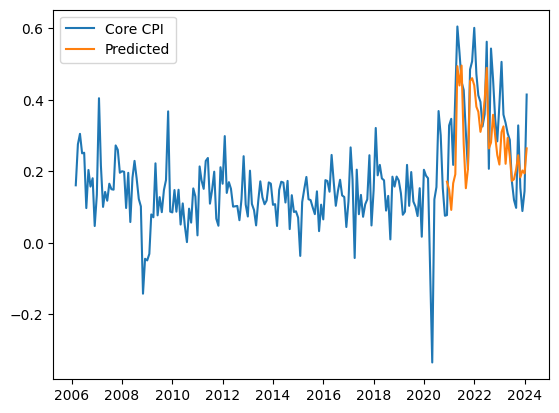

In [267]:
plt.plot(data.index, data['Core PCE'], label='Core CPI')
plt.plot(preds_dfs[0].index, preds_dfs[0]['Core PCE'], label='Predicted')
plt.legend()
plt.show()